## Compiled Questions

## Question 1

### Dataset Overview 

Our project uses the dataset “Emissions by Unit and Fuel Type (Subparts C, D, AA)”, obtained from the U.S. Environmental Protection Agency (EPA) through its Greenhouse Gas Reporting Program (GHGRP). The dataset provides facility-level and unit-level greenhouse gas (GHG) emissions data from the reporting years 2011 through 2023, focusing on large stationary industrial sources that emit 25,000 metric tons or more of CO₂-equivalent (CO₂e) annually.

All emissions are reported in metric tons of CO₂e, calculated using global warming potentials (GWPs) from the IPCC’s Fourth Assessment Report (AR4) to standardize the impact of CO₂, CH₄, and N₂O across facilities and fuels.

### Dataset Structure 

The file we created, emissions_by_unit_and_fuel_type_c_d_aa.xlsb, contains four sheets that organize and describe greenhouse gas emissions data collected by the EPA. The UNIT_DATA sheet lists individual emission units within each facility (e.g., boilers, turbines, process heaters) and includes variables such as Facility ID, Facility Name, State, NAICS Code, Year, Unit Type, Reporting Method, Maximum Heat Input, and emissions for CO₂, CH₄, N₂O, Biogenic CO₂, and Total CO₂e, allowing comparison of emissions intensity across facilities and equipment types. The FUEL_DATA sheet links facility and unit emissions to the type of fuel used, with columns for Facility ID, Unit ID, Industry Type, General Fuel Type, Specific Fuel Type, Blend Fuel Name, Other Fuel Name, and CH₄ and N₂O emissions (mt CO₂e); most “blend fuel” and “other fuel” fields are empty, indicating that single-fuel systems dominate. The Industry Type sheet defines each reporting subpart (C, D, AA) and connects it to its industrial category—such as Stationary Fuel Combustion, Electricity Generation, or Pulp and Paper Manufacturing—helping distinguish between different emission sources. Finally, the FAQs about this Data sheet provides definitions for key variables (Facility ID, FRS ID, NAICS Code), explains how biogenic CO₂ is reported, lists the Global Warming Potentials (GWPs) used in calculations, and includes official EPA links for verifying and exploring emissions data.

### Provenance: Who Collected the Data and Why 

The dataset was collected and published by the U.S. Environmental Protection Agency (EPA) under the Greenhouse Gas Reporting Program (GHGRP), which was established to track and reduce industrial greenhouse gas emissions.
Facilities that emit ≥25,000 metric tons CO₂e per year are legally required to report their emissions annually under 40 CFR Part 98.

The EPA collects this data to:

1. Quantify and monitor large-scale greenhouse gas emissions across U.S. industries.

2. Ensure transparency and compliance with federal climate policy.

3. Provide publicly accessible data for research, modeling, and policymaking.

Each submission is verified through EPA’s quality-assurance protocols, ensuring that the dataset is accurate, standardized, and consistent across reporting years.

### Missing Data and Limitations 

The dataset is largely complete and reliable, though a few areas show minor gaps that could influence the analysis. The Biogenic CO₂ and blend fuel columns are missing for most facilities, since many industrial sites do not use biomass or mixed-fuel systems. The Maximum Heat Input Capacity column is occasionally unreported, as it is optional for some facilities. In a few cases, facility identifiers have been withheld by the EPA as Confidential Business Information to protect proprietary data. It is also worth noting that the dataset only includes facilities emitting 25,000 metric tons or more of CO₂-equivalent per year, so smaller emitters are not represented and the focus is on large industrial sources. Despite these limitations, the essential variables such as Facility ID, Reporting Year, Industry Type, and Total Emissions for CO₂, CH₄, and N₂O are over 99 percent complete. This makes the dataset highly dependable and provides a solid foundation for modeling greenhouse gas emissions and analyzing uncertainty.

## Question 2

[missing]

## Question 3*

## Importing Packages

In [1]:
#import packages
import numpy as np 
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import pyxlsb


## Loading and Cleaning the Data

In [2]:
# Load emissions data
"""
Source: https://www.epa.gov/ghgreporting/data-sets
"""
emissions = pd.read_excel('emissions_by_unit_and_fuel_type_c_d_aa.xlsb', skiprows = 6)
emissions.head()

,Facility Id,FRS Id,Facility Name,City,State,Primary NAICS Code,Reporting Year,Industry Type (subparts),Industry Type (sectors),Unit Name,Unit Type,Unit Reporting Method,Unit Maximum Rated Heat Input Capacity (mmBTU/hr),Unit CO2 emissions (non-biogenic),Unit Methane (CH4) emissions,Unit Nitrous Oxide (N2O) emissions,Unit Biogenic CO2 emissions (metric tons)
0,1001155,1.100004e+11,1500 South Tibbs LLC d/b/a Aurorium Indianapol...,Indianapolis,IN,325199.0,2023,C,Chemicals,GP-1,NaN,Tier1/2/3,91.8,64740.5,30.50,36.356,0.0
1,1012147,NaN,17Z Gas Plant - Chevron USA Inc.,McKittrick,CA,211130.0,2018,"C,NN,W","Natural Gas and Natural Gas Liquids Suppliers,...",CP-03.00,OCS (Other combustion source),Tier1/2/3,30.0,3304.7,1.50,1.788,0.0
2,1012147,NaN,17Z Gas Plant - Chevron USA Inc.,McKittrick,CA,211130.0,2018,"C,NN,W","Natural Gas and Natural Gas Liquids Suppliers,...",CP-03.01,OCS (Other combustion source),Tier1/2/3,30.0,0.2,0.00,0.000,0.0
3,1012147,NaN,17Z Gas Plant - Chevron USA Inc.,McKittrick,CA,211130.0,2018,"C,NN,W","Natural Gas and Natural Gas Liquids Suppliers,...",CP-03.02,OCS (Other combustion source),Tier1/2/3,30.0,175.0,0.00,0.000,0.0
4,1012147,NaN,17Z Gas Plant - Chevron USA Inc.,McKittrick,CA,211130.0,2017,"C,NN,W","Natural Gas and Natural Gas Liquids Suppliers,...",CP-03.00,OCS (Other combustion source),Tier1/2/3,30.0,9106.1,4.25,5.066,0.0


In [3]:
# Load area data
"""
Source: https://www.census.gov/geographies/reference-files/2010/geo/state-area.html
"""
area = pd.read_csv('state_areas.csv', skiprows = 2)
area.head()

,EPA Region,State/Territory,Size Score,Sq. Mi.,Sq. Km.,Sq. Mi..1,Sq. Km..1,Sq. Mi..2,Sq. Km..2,Sq. Mi..3,Sq. Km..3,Sq. Mi..4,Sq. Km..4,Sq. Mi..5,Sq. Km..5,Sq. Mi..6,Sq. Km..6,Unnamed: 17,Unnamed: 18
0,4.0,Alabama,2,"52,420","135,767","50,645","131,171","1,775","4,597","1,058","2,740",517,"1,340",—,—,199,516,32.739632,-86.843459
1,10.0,Alaska,3,"665,384","1,723,337","570,641","1,477,953","94,743","245,383","19,304","49,997","26,119","67,647",—,—,"49,320","127,739",63.346191,-152.837068
2,9.0,American Samoa,1,581,"1,505",76,198,505,"1,307",8,21,—,—,—,—,497,"1,286",-14.263817,-170.662090
3,9.0,Arizona,3,"113,990","295,234","113,594","294,207",396,"1,026",396,"1,026",—,—,—,—,—,—,34.209964,-111.602401
4,6.0,Arkansas,2,"53,179","137,732","52,035","134,771","1,143","2,961","1,143","2,961",—,—,—,—,—,—,34.895526,-92.444626


In [4]:
# Get column names
print(emissions.columns)
print(area.columns)

Index(['Facility Id', 'FRS Id', 'Facility Name', 'City', 'State',
       'Primary NAICS Code', 'Reporting Year', 'Industry Type (subparts)',
       'Industry Type (sectors)', 'Unit Name', 'Unit Type',
       'Unit Reporting Method',
       'Unit Maximum Rated Heat Input Capacity (mmBTU/hr)',
       'Unit CO2 emissions (non-biogenic) ', 'Unit Methane (CH4) emissions ',
       'Unit Nitrous Oxide (N2O) emissions ',
       'Unit Biogenic CO2 emissions (metric tons)'],
      dtype='object')
Index(['EPA Region', 'State/Territory', 'Size Score', 'Sq. Mi.', 'Sq. Km.',
       'Sq. Mi..1', 'Sq. Km..1', 'Sq. Mi..2', 'Sq. Km..2', 'Sq. Mi..3',
       'Sq. Km..3', 'Sq. Mi..4', 'Sq. Km..4', 'Sq. Mi..5', 'Sq. Km..5',
       'Sq. Mi..6', 'Sq. Km..6', 'Unnamed: 17', 'Unnamed: 18'],
      dtype='object')


In [5]:
# Rename emissions columns
emissions = emissions.rename(columns={'State': 'State/Territory',
                                      'Unit CO2 emissions (non-biogenic) ': 'Non-Biogenic Unit CO2 Emissions',
                                     'Reporting Year': 'Year',
                                     'Unit Methane (CH4) emissions ': 'Unit Methane (CH4) emissions',
       'Unit Nitrous Oxide (N2O) emissions ': 'Unit Nitrous Oxide (N2O) emissions'})

In [6]:
# Group emissions df by state and reporting year 
# Only keep state, year, and unit CO2 emissions (non-biogenic) in emissions df
grouped_emissions = emissions.groupby(['State/Territory', 'Year'], as_index = False).agg({"Non-Biogenic Unit CO2 Emissions":'sum'})
grouped_emissions.head()

,State/Territory,Year,Non-Biogenic Unit CO2 Emissions
0,AK,2011,1.748238e+07
1,AK,2012,1.760305e+07
2,AK,2013,1.727435e+07
3,AK,2014,1.672759e+07
4,AK,2015,1.719359e+07


In [7]:
# Only keep state and total square mileage in area df
area = area[['State/Territory', 'Sq. Mi.']]

# Rename column names for clarity
area = area.rename(columns={'Sq. Mi.': 'SqMi'})

# Convert area to an int
# Remove commas first
area['SqMi'] = area['SqMi'].str.replace(",", "")
area['SqMi'] = area['SqMi'].astype(int)

# Replace state names with abbreviations: sourced from https://gist.github.com/rogerallen/1583593
us_state_to_abbrev = {"Alabama": "AL", "Alaska": "AK", "Arizona": "AZ", "Arkansas": "AR", "California": "CA", "Colorado": "CO", "Connecticut": "CT", "Delaware": "DE",
    "Florida": "FL", "Georgia": "GA", "Hawaii": "HI", "Idaho": "ID", "Illinois": "IL", "Indiana": "IN", "Iowa": "IA", "Kansas": "KS", "Kentucky": "KY", "Louisiana": "LA",
    "Maine": "ME", "Maryland": "MD", "Massachusetts": "MA", "Michigan": "MI", "Minnesota": "MN", "Mississippi": "MS", "Missouri": "MO", "Montana": "MT", "Nebraska": "NE",
    "Nevada": "NV", "New Hampshire": "NH", "New Jersey": "NJ", "New Mexico": "NM", "New York": "NY", "North Carolina": "NC", "North Dakota": "ND", "Ohio": "OH", 
    "Oklahoma": "OK", "Oregon": "OR", "Pennsylvania": "PA", "Rhode Island": "RI", "South Carolina": "SC", "South Dakota": "SD", "Tennessee": "TN", "Texas": "TX", "Utah": "UT",
    "Vermont": "VT", "Virginia": "VA", "Washington": "WA", "West Virginia": "WV", "Wisconsin": "WI", "Wyoming": "WY", "District of Columbia": "DC", "American Samoa": "AS",
    "Guam": "GU", "Northern Mariana Islands": "MP", "Puerto Rico": "PR", "United States Minor Outlying Islands": "UM","Virgin Islands, U.S.": "VI"}
area['State/Territory'] = area['State/Territory'].replace(us_state_to_abbrev)

area.head()

,State/Territory,SqMi
0,AL,52420
1,AK,665384
2,AS,581
3,AZ,113990
4,AR,53179


In [8]:
# Check how many unique reporting years exist
grouped_emissions["Year"].unique()

array([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023, 2010])

In [9]:
# Take the log of Unit CO2 emissions (non biogenic) given the large values and range
grouped_emissions["UnitE_Log"] = np.log(grouped_emissions["Non-Biogenic Unit CO2 Emissions"])
grouped_emissions.head()

,State/Territory,Year,Non-Biogenic Unit CO2 Emissions,UnitE_Log
0,AK,2011,1.748238e+07,16.676704
1,AK,2012,1.760305e+07,16.683583
2,AK,2013,1.727435e+07,16.664733
3,AK,2014,1.672759e+07,16.632570
4,AK,2015,1.719359e+07,16.660047


In [10]:
# Take the log of area as well, also given the large values and range
area["SqMi_Log"] = np.log(area["SqMi"])
area.head()

,State/Territory,SqMi,SqMi_Log
0,AL,52420,10.867043
1,AK,665384,13.408120
2,AS,581,6.364751
3,AZ,113990,11.643866
4,AR,53179,10.881419


In [11]:
# Check for NaN values in grouped_emissions df
grouped_emissions.isna().sum()

State/Territory                    0
Year                               0
Non-Biogenic Unit CO2 Emissions    0
UnitE_Log                          0
dtype: int64

In [12]:
# Check for NaN values in area df
area.isna().sum()

State/Territory    0
SqMi               0
SqMi_Log           0
dtype: int64

## Graphing the Emissions Data: ECDF and KDE

Text(0, 0.5, 'Proportion')

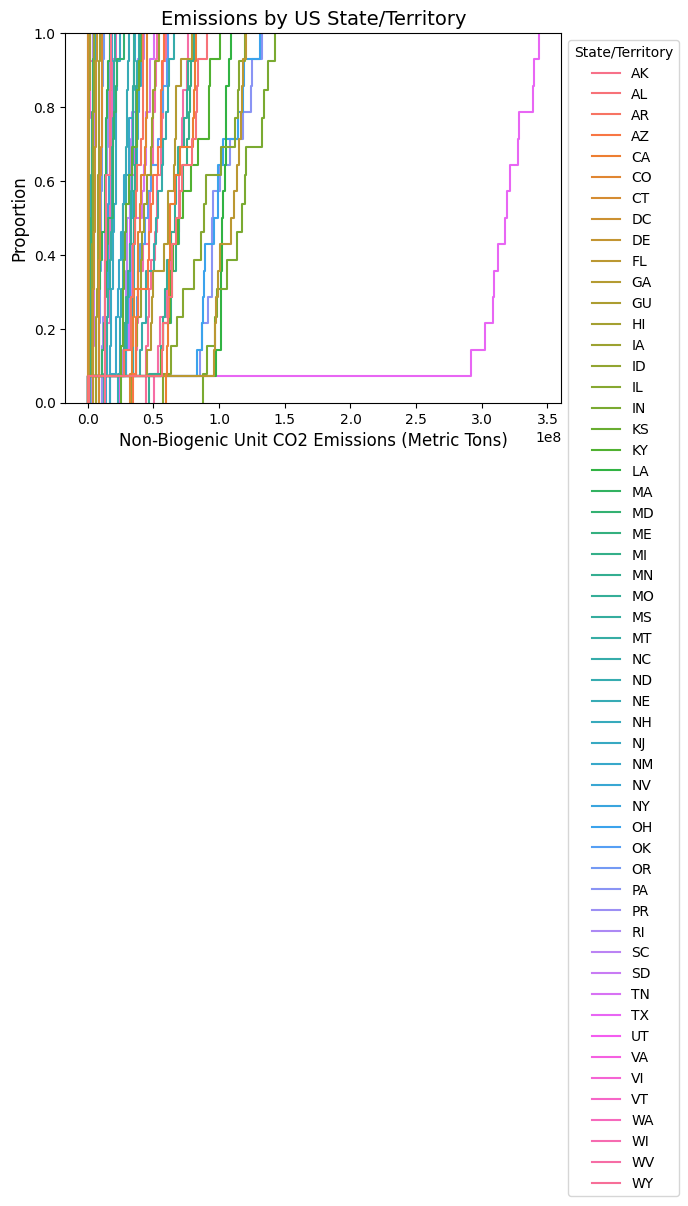

In [13]:
# ECDF of CO2 emissions (no log transformation ) metric tons
ax = sns.ecdfplot(data=grouped_emissions, x="Non-Biogenic Unit CO2 Emissions", hue = "State/Territory")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_title("Emissions by US State/Territory", fontsize=14)
ax.set_xlabel("Non-Biogenic Unit CO2 Emissions (Metric Tons)", fontsize=12)
ax.set_ylabel("Proportion", fontsize=12)

Text(0.5, 1.0, 'Emissions by US State/Territory')

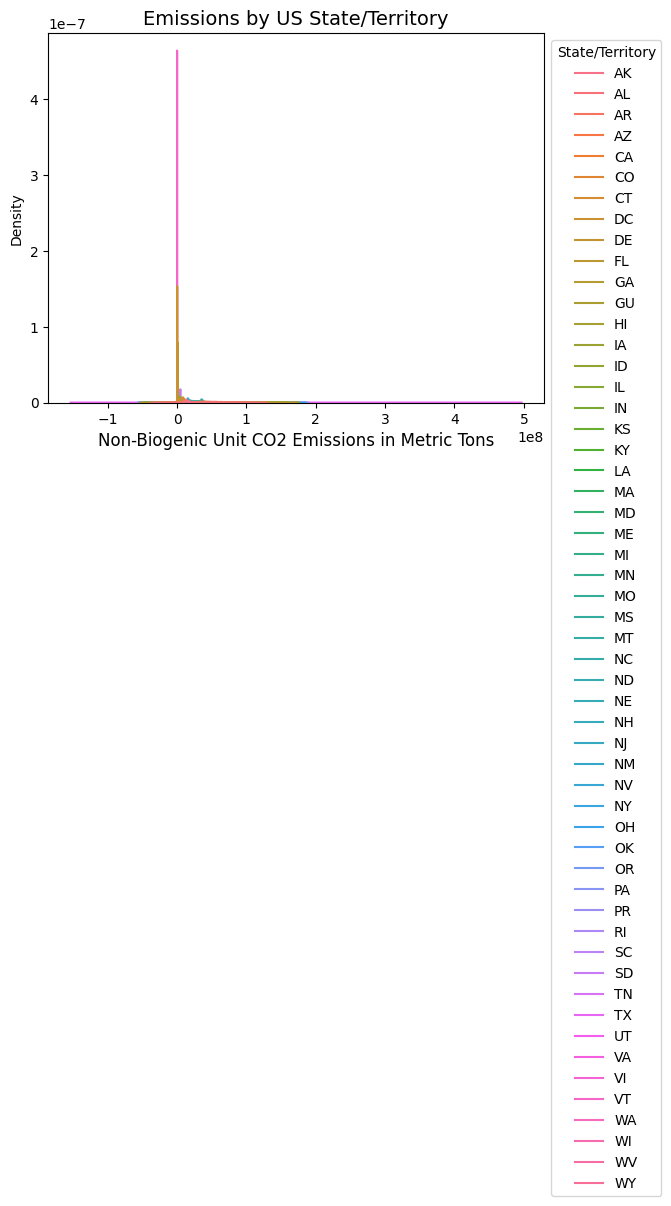

In [14]:
# KDE of CO2 emissions (no log transformation ) metric tons
ax = sns.kdeplot(data=grouped_emissions, x="Non-Biogenic Unit CO2 Emissions", hue="State/Territory")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_xlabel("Non-Biogenic Unit CO2 Emissions in Metric Tons", fontsize=12)
ax.set_title("Emissions by US State/Territory", fontsize=14)

## Graphing the Log of the Emissions Data: ECDF and KDE

Text(0, 0.5, 'Proportion')

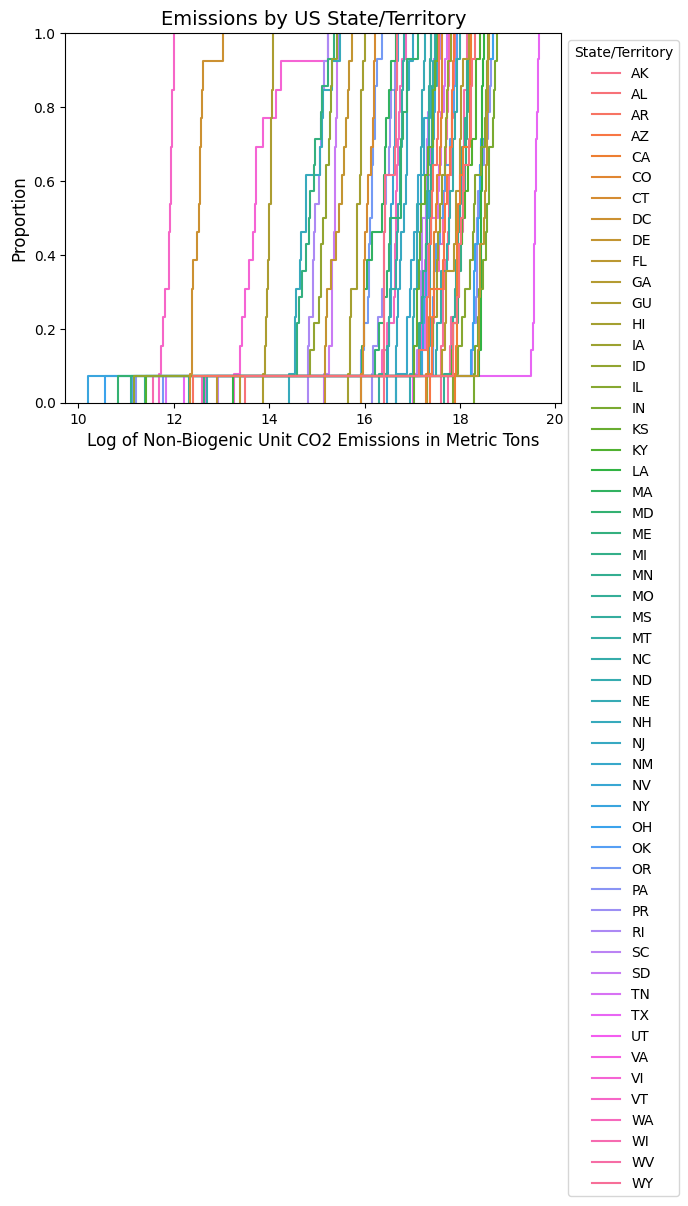

In [15]:
# ECDF of logged CO2 emissions metric tons

ax = sns.ecdfplot(data=grouped_emissions, x="UnitE_Log", hue = "State/Territory")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_title("Emissions by US State/Territory", fontsize=14)
ax.set_xlabel("Log of Non-Biogenic Unit CO2 Emissions in Metric Tons", fontsize=12)
ax.set_ylabel("Proportion", fontsize=12)

Text(0.5, 1.0, 'Emissions by US State/Territory')

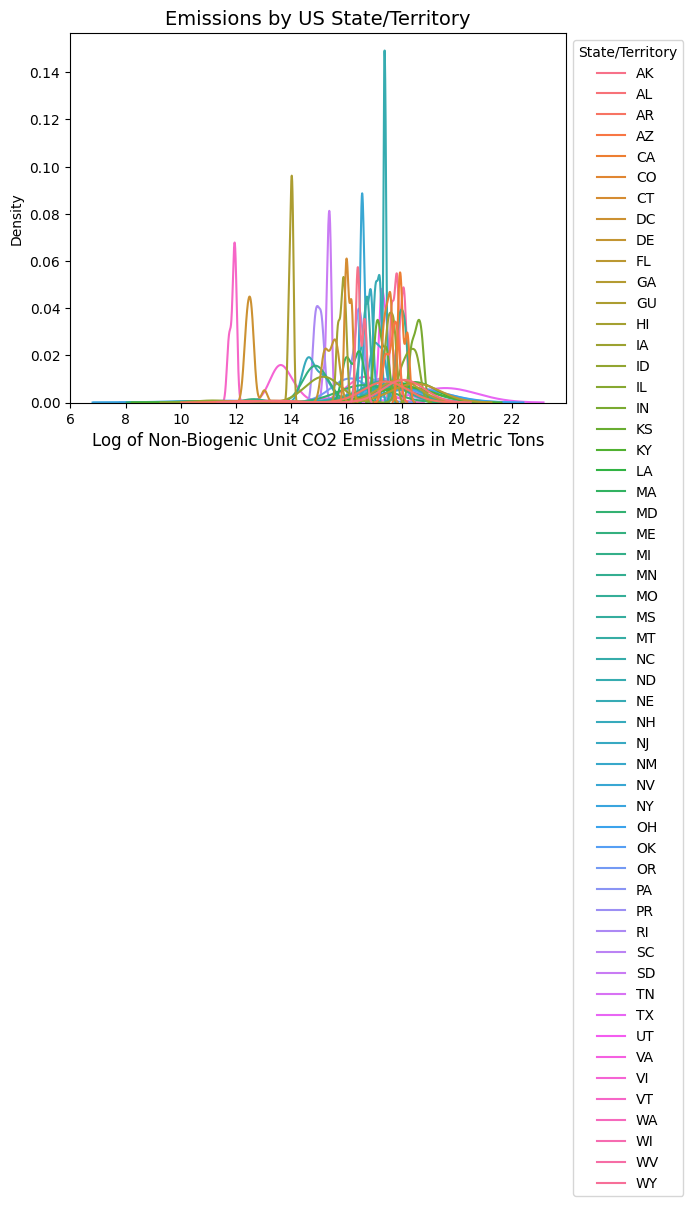

In [16]:
# KDE of logged CO2 emissions metric tons

ax = sns.kdeplot(data=grouped_emissions, x="UnitE_Log", hue="State/Territory")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_xlabel("Log of Non-Biogenic Unit CO2 Emissions in Metric Tons", fontsize=12)
ax.set_title("Emissions by US State/Territory", fontsize=14)

## Finding Emittors Per Area

In [17]:
# Merge dataframes
merged = pd.merge(grouped_emissions, area, on='State/Territory')
merged.head()

,State/Territory,Year,Non-Biogenic Unit CO2 Emissions,UnitE_Log,SqMi,SqMi_Log
0,AK,2011,1.748238e+07,16.676704,665384,13.40812
1,AK,2012,1.760305e+07,16.683583,665384,13.40812
2,AK,2013,1.727435e+07,16.664733,665384,13.40812
3,AK,2014,1.672759e+07,16.632570,665384,13.40812
4,AK,2015,1.719359e+07,16.660047,665384,13.40812


In [18]:
merged['Ratio'] = merged['Non-Biogenic Unit CO2 Emissions']/merged['SqMi']
merged.head()

,State/Territory,Year,Non-Biogenic Unit CO2 Emissions,UnitE_Log,SqMi,SqMi_Log,Ratio
0,AK,2011,1.748238e+07,16.676704,665384,13.40812,26.274125
1,AK,2012,1.760305e+07,16.683583,665384,13.40812,26.455470
2,AK,2013,1.727435e+07,16.664733,665384,13.40812,25.961479
3,AK,2014,1.672759e+07,16.632570,665384,13.40812,25.139752
4,AK,2015,1.719359e+07,16.660047,665384,13.40812,25.840102


Text(0, 0.5, 'Proportion')

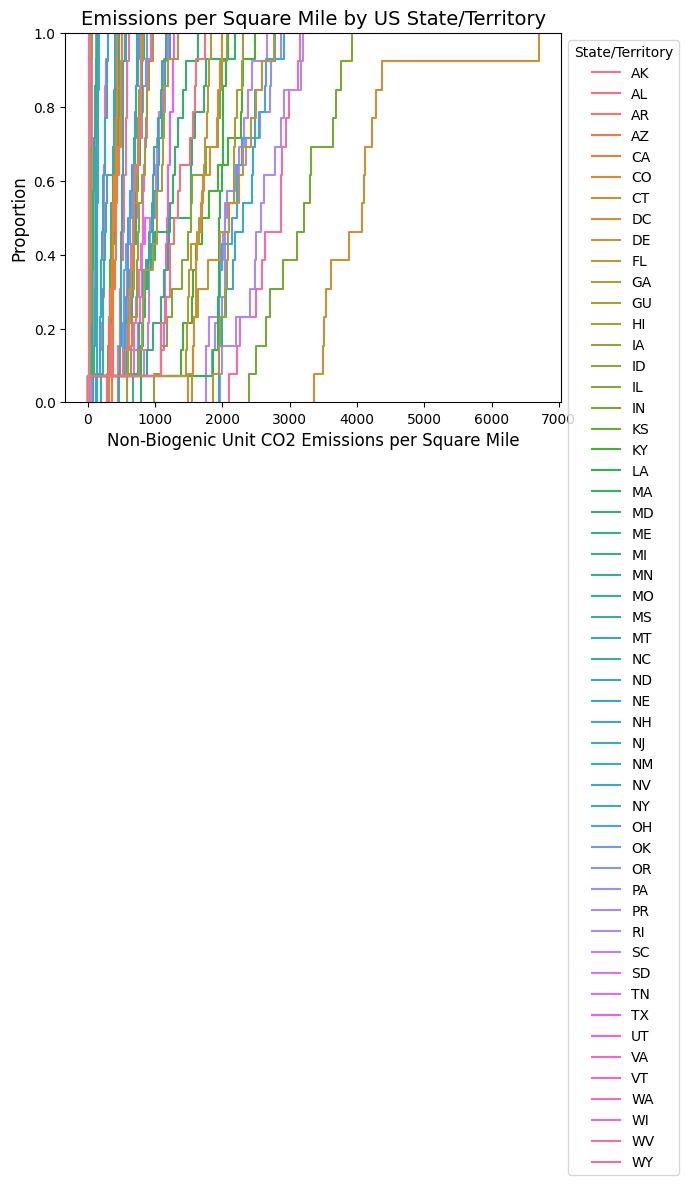

In [19]:
# ECDF of ratio

ax = sns.ecdfplot(data=merged, x="Ratio", hue = "State/Territory")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_title("Emissions per Square Mile by US State/Territory", fontsize=14)
ax.set_xlabel("Non-Biogenic Unit CO2 Emissions per Square Mile", fontsize=12)
ax.set_ylabel("Proportion", fontsize=12)

Text(0.5, 1.0, 'Emissions per Square Mile by US State/Territory')

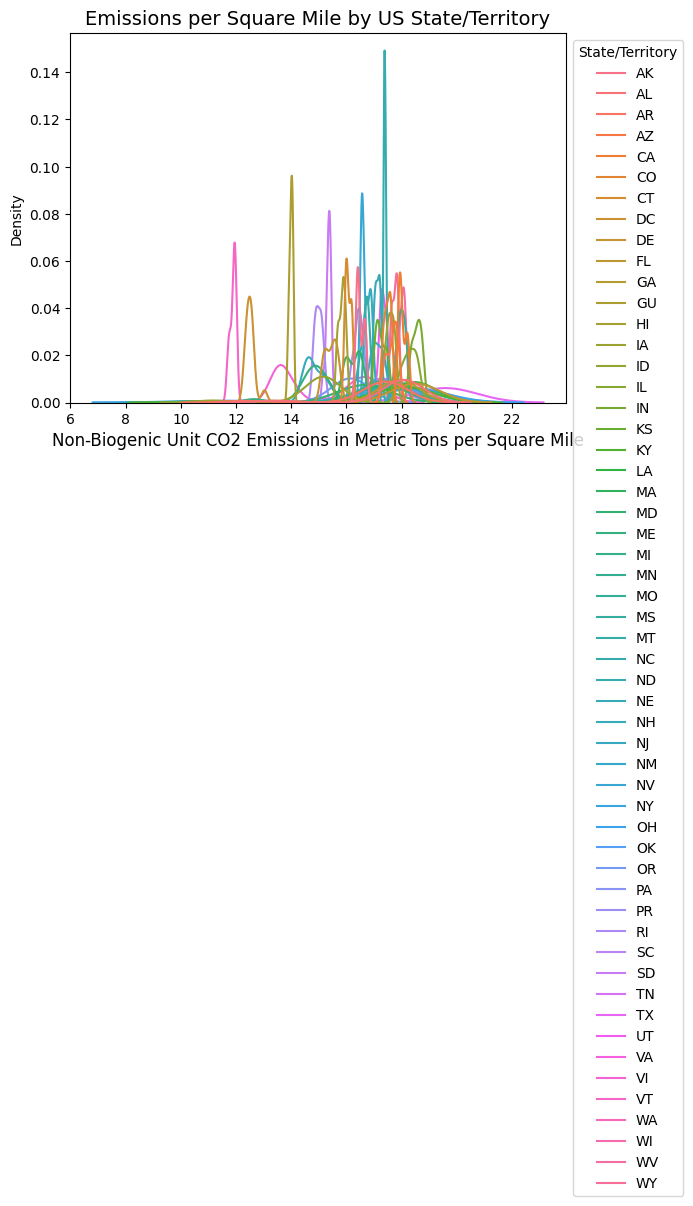

In [20]:
# KDE of ratio

ax = sns.kdeplot(data=grouped_emissions, x="UnitE_Log", hue="State/Territory")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_xlabel("Non-Biogenic Unit CO2 Emissions in Metric Tons per Square Mile", fontsize=12)
ax.set_title("Emissions per Square Mile by US State/Territory", fontsize=14)

## Identifying the Greatest Emitters 

In [21]:
# What is the average emission ratio over the years?
merged_avg = merged.groupby('State/Territory').agg({'Ratio':'mean'}).sort_values(by='Ratio')

# What are the 5 first (lowest) and 5 last (highest) emitters per area?
merged_extreme =  merged_avg.tail()
merged_extreme

,Ratio
State/Territory,
NJ,2298.062312
PR,2590.739225
WV,2700.915952
IN,3162.917299
DC,4097.925905


In [22]:
# Only selecting the 5 highest emmitors from the merged df
states_to_select = ['NJ', 'PR', 'WV', 'IN', 'DC']
filter_mask = merged['State/Territory'].isin(states_to_select)
selected_states = merged[filter_mask]
selected_states

,State/Territory,Year,Non-Biogenic Unit CO2 Emissions,UnitE_Log,SqMi,SqMi_Log,Ratio
93,DC,2011,455688.80,13.029565,68,4.219508,6701.305882
94,DC,2012,280235.80,12.543387,68,4.219508,4121.114706
95,DC,2013,263970.40,12.483592,68,4.219508,3881.917647
96,DC,2014,287477.80,12.568901,68,4.219508,4227.614706
97,DC,2015,245449.80,12.410848,68,4.219508,3609.555882
...,...,...,...,...,...,...,...
695,WV,2019,60571699.50,17.919338,24230,10.095347,2499.863785
696,WV,2020,53564193.80,17.796391,24230,10.095347,2210.655955
697,WV,2021,62643714.10,17.952974,24230,10.095347,2585.378213
698,WV,2022,54791548.21,17.819047,24230,10.095347,2261.310285


Text(0, 0.5, 'Proportion')

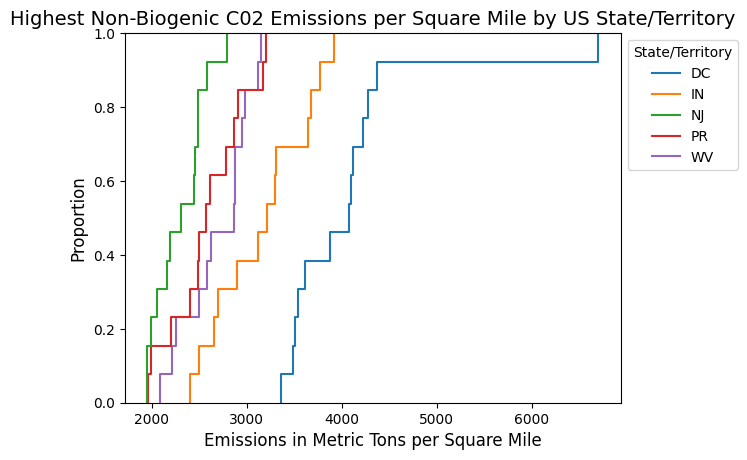

In [23]:
# ECDF of high ratios

ax = sns.ecdfplot(data=selected_states, x="Ratio", hue = "State/Territory")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_title("Highest Non-Biogenic C02 Emissions per Square Mile by US State/Territory", fontsize=14)
ax.set_xlabel("Emissions in Metric Tons per Square Mile", fontsize=12)
ax.set_ylabel("Proportion", fontsize=12)

Text(0.5, 1.0, 'Highest Non-Biogenic C02 Emissions per Square Mile by US State/Territory')

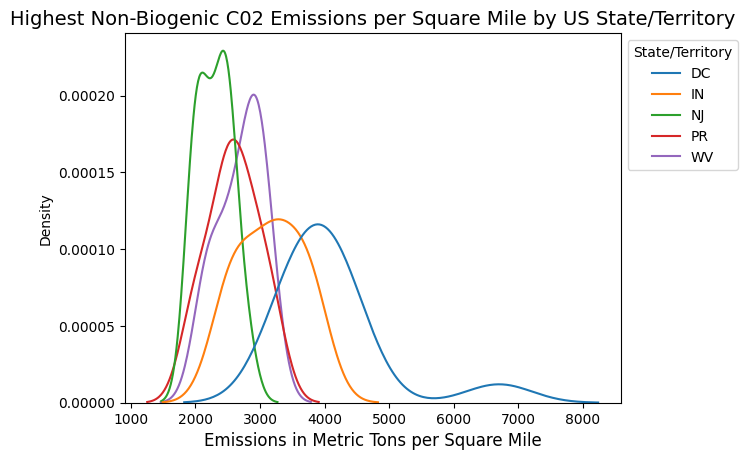

In [24]:
# KDE of highest ratios

ax = sns.kdeplot(data=selected_states, x="Ratio", hue = "State/Territory")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_xlabel("Emissions in Metric Tons per Square Mile", fontsize=12)
ax.set_title("Highest Non-Biogenic C02 Emissions per Square Mile by US State/Territory", fontsize=14)

## Exploring Population Density

In [25]:
"""
Source: https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_population_density#:~:text=Table_title:%20States%20and%20territories%20by%20population%20density,%7C%20Density:%201%2C060%20%7C%20:%20409%20%7C
"""
# Loading data on population density
density = pd.read_csv('density.csv',skiprows=2)
density.head()

,/mi2,/km2,mi2
0,District of Columbia,"11,131","4,297"
1,New Jersey,"1,263",488
2,Rhode Island,"1,060",409
3,Puerto Rico,936,361
4,Massachusetts,898,347


In [26]:
# Cleaning up the data
replace_map = {'/mi2': 'State/Territory',
               '/km2': 'per_km_2',
               'mi2': 'per_mi_2'}

density = density.rename(columns=replace_map)  
density 

,State/Territory,per_km_2,per_mi_2
0,District of Columbia,"11,131","4,297"
1,New Jersey,"1,263",488
2,Rhode Island,"1,060",409
3,Puerto Rico,936,361
4,Massachusetts,898,347
5,Guam[4],824,319
6,Connecticut,747,288
7,U.S. Virgin Islands[4],737,284
8,Maryland,637,246
9,American Samoa[4],578,222


### NJ (#5 emitter) = #2 most densely populated
### PR (#3-4 emitter) = #4 most densely populated
### WV (#3-4 emitter)= #34 most densely populated --> outsize impact?
### IN (#2 emitter)= #23 most densely populated --> outsize impact?
### DC (#1 emitter) = #1 most densely populated

## Questions

How are you fitting your model to the phenomenon to get realistic properties of the data?
- We had to aggregate all the cities together to get one row per State and Year
- We picked Non-Biogenic CO2 emissions to focus on because it is the type of emission that is a result of non-renewable carbon sources such as Coal, Oil, Natural gas, and Petroleum products. These are human-caused CO2 emissions rather than natural processes. These carbon dioxide sources are directly addressable by humans and are therefore intriguing from a media and communications perspective. 
- We wanted to get a sense of emissions per area - some states may have larger emissions by virtue of being a larger state, and it's not good practice to assign that state a descriptor of "large emittor" without taking this into account. This gave us a realistic picture of the data.
 
What challenges did you have to overcome? 
- The emissions were large and constituted a large range - so taking a log helped standardize the data and make it easier to visualize. The overall quality of the data was good in part due to pre-cleaning the data ahead of visualizations. 
- The area was also large with a large range; taking a log solved the same problems.
- Should we have normalzied for population data?

How are you fitting your model to the phenomenon to get realistic properties of the data?
- We had to aggregate all the cities together to get one row per State and Year
- We picked Non-Biogenic CO2 emissions to focus on because it is the type of emission that is a result of non-renewable carbon sources such as Coal, Oil, Natural gas, and Petroleum products. These are human-caused CO2 emissions rather than natural processes. These carbon dioxide sources are directly addressable by humans and are therefore intriguing from a media and communications perspective. 
- We wanted to get a sense of emissions per area - some states may have larger emissions by virtue of being a larger state, and it's not good practice to assign that state a descriptor of "large emittor" without taking this into account. This gave us a realistic picture of the data.
 
What challenges did you have to overcome? 
- The emissions were large and constituted a large range - so taking a log helped standardize the data and make it easier to visualize. The overall quality of the data was good in part due to pre-cleaning the data ahead of visualizations. 
- The area was also large with a large range; taking a log solved the same problems.

## Question 4

In [27]:
# stat function for bootstrapping purposes

def stat(x):
    stat = np.mean(x)
    return stat

### Bootstrapping by state

In [28]:
def simulate_by_state(var, df, fcn, S=1000, plot=True):
    results = []

    for state in df['State/Territory'].dropna().unique():
        x = df.loc[df['State/Territory'] == state, var]

        estimates = []
        for s in range(S):
            x_s = x.sample(frac=1.0, replace=True)
            estimates.append(fcn(x_s))  

        estimates = np.array(estimates) 

       
        results.extend([{"State/Territory": state, "Ratio": val} for val in estimates])

    df_boot = pd.DataFrame(results)

    if plot:
        fig, axes = plt.subplots(1, 2, figsize=(14, 6))


        sns.kdeplot(data=df_boot, x="Ratio", hue="State/Territory", ax=axes[0])
        axes[0].set_title("KDE of Bootstrapped Estimates")

 
        legend0 = axes[0].get_legend()
        if legend0:
            legend0.set_bbox_to_anchor((1.0, 1.0))
            legend0.set_loc('upper right')
            legend0.set_title('State/Territory')
        

        sns.ecdfplot(data=df_boot, x="Ratio", hue="State/Territory", ax=axes[1])
        axes[1].set_title("ECDF of Bootstrapped Estimates")

        legend1 = axes[1].get_legend()
        if legend1:
            legend1.set_bbox_to_anchor((1.05, 1.0)) 
            legend1.set_loc('upper left')
            legend1.set_title('State/Territory')

      
        plt.tight_layout()

        plt.show()

    return df_boot

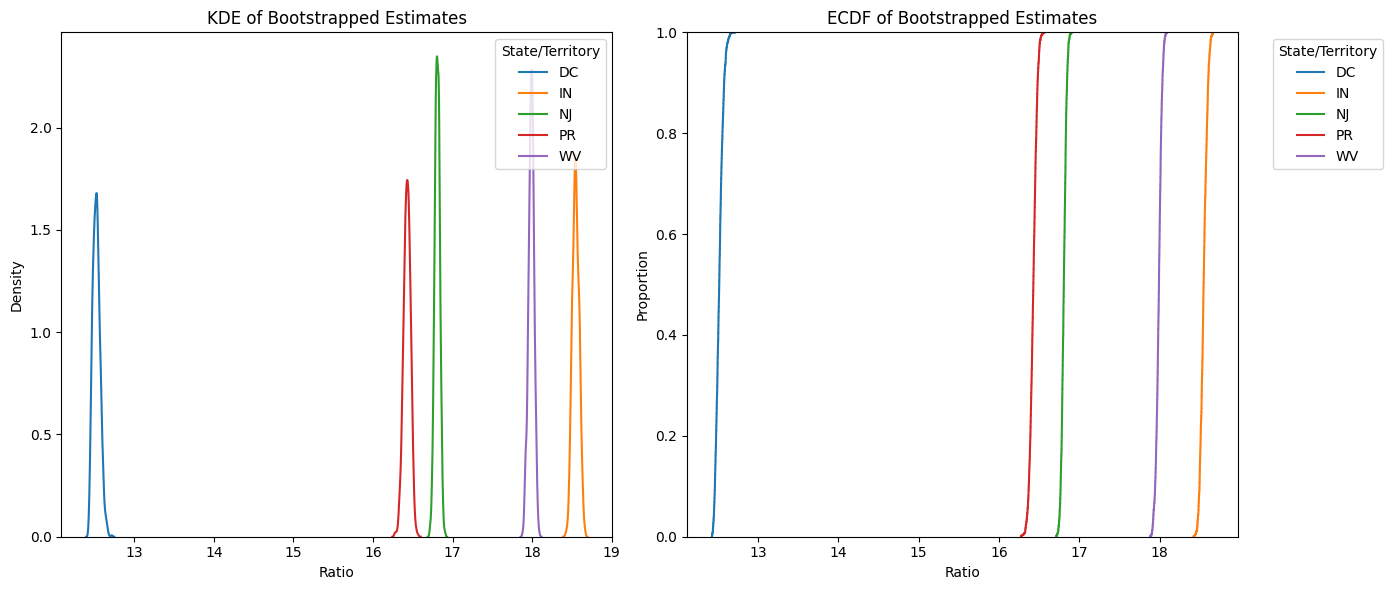

,State/Territory,Ratio
0,DC,12.533275
1,DC,12.512596
2,DC,12.552892
3,DC,12.536269
4,DC,12.539266
...,...,...
4995,WV,18.015895
4996,WV,17.997905
4997,WV,18.013899
4998,WV,18.024695


In [29]:
var = 'UnitE_Log'
simulate_by_state(var, selected_states, stat)

### Bootstrapping the overall data

In [30]:
def simulate(var, df, fcn, S=1000, plot=True): 
    ''' Bootstrap simulation code. '''    
    x = df[var]

    estimates = []
    for s in range(S): 
        x_s = x.sample(frac=1.0,replace=True) 
        stat_s = fcn(x_s)
      
        estimates.append(stat_s)
    estimates = np.array(estimates) #

    if plot:
        fig, axes = plt.subplots(1, 3, figsize=(16, 4)) 
        sns.kdeplot(x, ax = axes[0]).set(title='KDE of Underlying Data')
        sns.kdeplot(estimates, ax = axes[1]).set(title='KDE of Computed Statistics')
        axes[1].axvline(x=fcn(x), color='orange', linestyle='--')
        sns.ecdfplot(estimates, ax = axes[2]).set(title='ECDF of Computed Statistics')
        axes[2].axvline(x=fcn(x), color='orange', linestyle='--')
        plt.show()
        print(f'Variance of estimates is: {np.var(estimates)}')
        
    return estimates


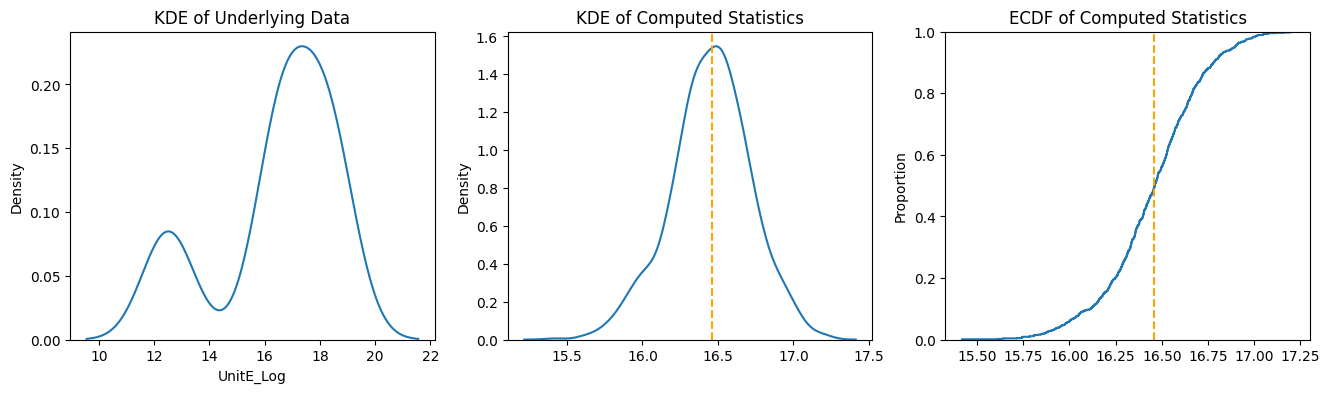

Variance of estimates is: 0.07104058003028181


array([17.05083045, 16.55224491, 16.21203576, 16.07044169, 16.18801572,
       16.68452717, 16.77622799, 16.71215705, 16.91268744, 16.2053385 ,
       16.72416215, 16.17918734, 16.47585791, 16.57999213, 16.22538246,
       16.41795139, 16.95622229, 16.36231749, 16.52649319, 16.51596171,
       15.74529403, 16.62804235, 16.20879892, 16.36050138, 16.33616817,
       16.39849076, 16.67032239, 16.29432451, 16.95255345, 16.53454104,
       16.30321306, 16.18289496, 15.97627315, 16.11984796, 16.33148353,
       16.53492986, 16.66424606, 16.13960283, 16.47856932, 16.34958408,
       15.99676158, 16.83214301, 16.53125259, 16.16520561, 16.28673615,
       16.67916035, 16.29217112, 16.80597976, 16.82875051, 16.36803065,
       16.7058241 , 16.55647298, 16.32756286, 16.37826519, 16.54312115,
       16.59597543, 16.56752869, 16.67619376, 16.45908518, 16.54374885,
       16.26992099, 16.56788172, 16.12046168, 16.49548935, 16.44982611,
       16.70477891, 16.71827133, 15.74053184, 16.55567118, 16.47

In [31]:
var = 'UnitE_Log'
simulate(var, selected_states, stat)

## Question 5

Our sequences do not have the property of the training data when we categorized by state in our bootstrap. Each state only has about 10 entries, so the sample size per state was very small. The bootstrapping pulling the same values over again/ This led to low variance per each state indicated by the high peaks in the KDE and the smoother ECDF. Our estimates are not credible and reliable because sample size per state to small. Looking at the overall KDEs and ECDF for the underlying data, there was a high density of emitting states towards the right side of the graph (higher emissions). However, since there was a secondary peak towards the left of the underlying KDE plot, the averaged bootstrapping points had a higher density at a lower emission value. Moreover, the KDE visualization of the computed statistics showed a normal distribution, indicating that our bootstrapping function had enough samples to approach a normal distribution. The ECDF of the bootstrapped value again reflects a normal distribution. Overall, the process of bootstrapping the overall data provided more credible and reliable results than bootstrapping by states.

## Question 6